In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# Define the function of three variables
def func(x):
    return x[0]**2 * x[1] + 4 * x[1]**2 - x[1] * x[2] + 1 / (x[2])

In [24]:
# Numerical gradient using central difference
def numerical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.copy(x)
        x_backward = np.copy(x)
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(x_forward) - f(x_backward)) / (2 * h)
    return grad

# Backtracking line search with Armijo condition
def backtracking_line_search(f, x, p, grad, alpha=1.0, rho=0.5, mu1=1e-4, max_backtrack=20):
    fx = f(x)
    grad_p = grad @ p  # Precompute dot product
    for _ in range(max_backtrack):
        if f(x + alpha*p) <= fx + mu1 * alpha * grad_p:
            return alpha
        alpha *= rho
    return alpha  # Return alpha terakhir jika max_backtrack tercapai

# Steepest descent optimization
def steepest_descent(f, x0, tol=1e-6, max_iter=1000, mu1=1e-4, rho=0.5):
    x = np.asarray(x0, dtype=float)
    assert x.ndim == 1, "x0 harus vektor 1D"
    path = [x.copy()]
    for k in range(max_iter):
        grad = numerical_gradient(f, x)
        if np.linalg.norm(grad) < tol:
            print(f"Konvergensi tercapai pada iterasi {k}.")
            break   
        p = -grad
        alpha = backtracking_line_search(f, x, p, grad, mu1=mu1, rho=rho)
        x = x + alpha * p
        path.append(x.copy())
    else:
        print("Peringatan: Maksimum iterasi tercapai tanpa konvergensi.")
    return x, path

# Numerical Hessian using central difference
def numerical_hessian(f, x, h=1e-5):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            x_ijpp = np.copy(x)
            x_ijpm = np.copy(x)
            x_ijmp = np.copy(x)
            x_ijmm = np.copy(x)
            x_ijpp[i] += h
            x_ijpp[j] += h
            x_ijpm[i] += h
            x_ijpm[j] -= h
            x_ijmp[i] -= h
            x_ijmp[j] += h
            x_ijmm[i] -= h
            x_ijmm[j] -= h
            hessian[i, j] = (f(x_ijpp) - f(x_ijpm) - f(x_ijmp) + f(x_ijmm)) / (4 * h**2)
    return hessian

def newton_method(f, x0, tol=1e-6, max_iter=1000, mu1=1e-4, rho=0.5, h_hessian=1e-5):
    x = np.asarray(x0, dtype=float)
    assert x.ndim == 1, "x0 harus vektor 1D"
    path = [x.copy()]
    for k in range(max_iter):
        grad = numerical_gradient(f, x)
        if np.linalg.norm(grad) < tol:
            print(f"Konvergensi tercapai pada iterasi {k}.")
            break 
        hessian = numerical_hessian(f, x, h=h_hessian)
        hessian += 1e-6 * np.eye(len(x)) * np.linalg.norm(hessian)  # Regularisasi adaptif
        try:
            p = -np.linalg.solve(hessian, grad)
        except np.linalg.LinAlgError:
            print("Peringatan: Hessian singular, fallback ke steepest descent.")
            p = -grad  
        alpha = backtracking_line_search(f, x, p, grad, mu1=mu1, rho=rho)
        x = x + alpha * p
        path.append(x.copy())
    else:
        print("Peringatan: Maksimum iterasi tercapai tanpa konvergensi.")
    return x, path

print("\n" + "="*50 + "\n")
# Initialize the function and starting point
x0 = np.array([2, 2, 2])  # Dengan asumsi
# x0 = np.array([-2.6, -3.3, 2.4]) # Dengan Grid Search
# x0 = np.array([-10.0, -10.0, 1.0]) # Dengan Grid Search

print("Metode Steepest Descent")
xmin, path = steepest_descent(func, x0)
path = np.array(path)

print(f"Local minimum point: {xmin}")
print(f"Local minimum value: {func(xmin)}")
print(f"Gradient norm at the local minimum: {np.linalg.norm(numerical_gradient(func, xmin))}")
print(f"Total iterations: {len(path) - 1}")


print("\n" + "="*50 + "\n")

# Run optimization using Newton's Method
print("Metode Newton's Method")
xmin_newton, path_newton = newton_method(func, x0)
path_newton = np.array(path_newton)

print(f"Local minimum point: {xmin_newton}")
print(f"Local minimum value: {func(xmin_newton)}")
print(f"Gradient norm at the local minimum: {np.linalg.norm(numerical_gradient(func, xmin_newton))}")
print(f"Total iterations: {len(path_newton) - 1}")
# Print the last 5 iterations
for i, point in enumerate(path_newton[-5:], start=len(path_newton) - 5):
    print(f"Iteration ke {i}: {point}")

print("\n" + "="*50 + "\n")




Metode Steepest Descent
Peringatan: Maksimum iterasi tercapai tanpa konvergensi.
Local minimum point: [  -1.53219889  164.11721595 1333.57727977]
Local minimum value: -110739.86031072123
Gradient norm at the local minimum: 529.3373369612626
Total iterations: 1000


Metode Newton's Method
Peringatan: Hessian singular, fallback ke steepest descent.
Konvergensi tercapai pada iterasi 5.
Local minimum point: [ 8.41813596e+16 -3.33074714e+17 -6.78926601e+04]
Local minimum value: -2.360334393069637e+51
Gradient norm at the local minimum: 0.0
Total iterations: 5
Iteration ke 1: [ 19951.18699106 -19949.24025525 -79792.6784396 ]
Iteration ke 2: [ 19951.18668011 -19949.2400998  -79792.67843959]
Iteration ke 3: [ 1.97881612e+04 -7.29195845e+07 -7.97926866e+04]
Iteration ke 4: [ 5.77197588e+08 -7.29076845e+07 -6.78926601e+04]
Iteration ke 5: [ 8.41813596e+16 -3.33074714e+17 -6.78926601e+04]




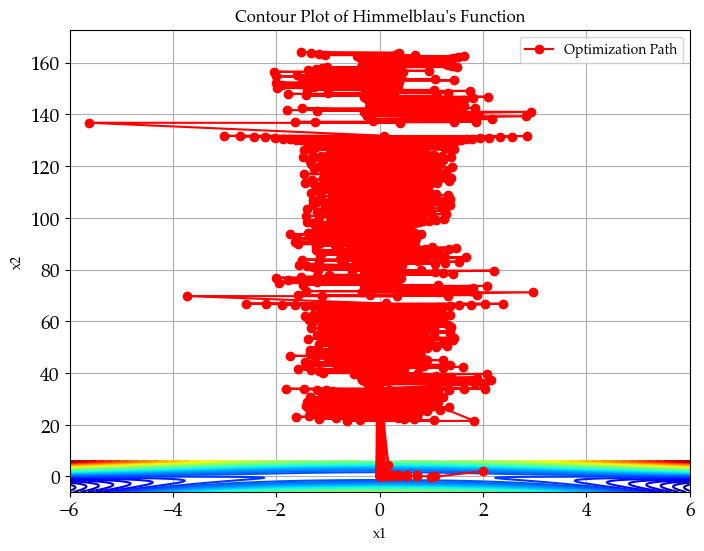

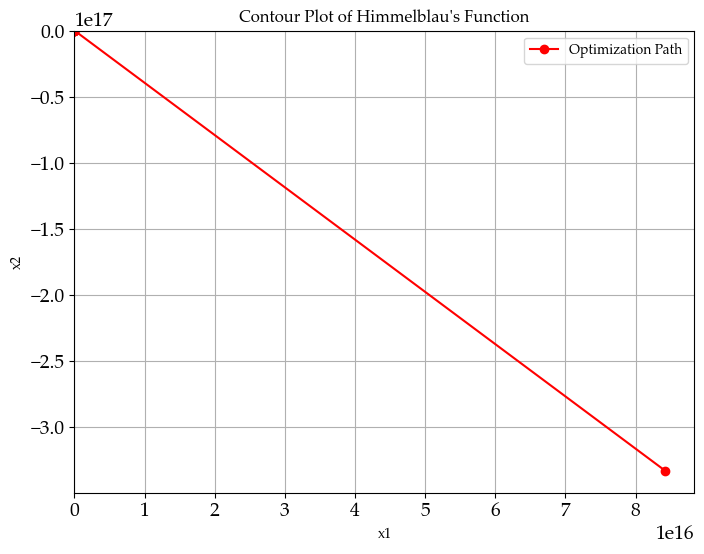

In [25]:
# 6. Create contour plot
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = func([X, Y, 1])  # Asumsi nilai x[2] = 1 untuk visualisasi 3D ke 2D

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, Z, levels=50, cmap='jet')
ax.plot(path[:, 0], path[:, 1], marker='o', color='red', label='Optimization Path')
ax.set_title("Contour Plot of Himmelblau's Function")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.grid(True)

fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, Z, levels=50, cmap='jet')
ax.plot(path_newton[:, 0], path_newton[:, 1], marker='o', color='red', label='Optimization Path')
ax.set_title("Contour Plot of Himmelblau's Function")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.grid(True)